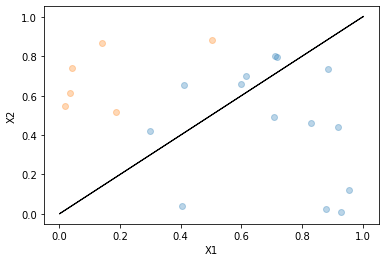

In [172]:
import matplotlib.pyplot as plt
import numpy as np

def geradataset(tamanho=20):
    X = np.random.uniform(size=(tamanho,2))
    y = np.array(X[:,0]>X[:,1]-0.25, dtype=int)*2-1
    return X, y

def plotadataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

def perpendicular(vetor):
    rotaciona = np.array([[0,1],[-1,0]])
    perp = np.matmul(vetor,rotaciona)
    return perp

X, y = geradataset(20)
plotadataset(X, y)
vetor = [1, -1]
hiperplano = perpendicular(vetor)
plt.arrow(*[0,0], *hiperplano)
plt.show()

# Funções de Custo

In [173]:
class CustoPerceptron():
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum(CustoPerceptron.erro(y, ypred)**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(CustoPerceptron.erro(y, ypred), X)

class HingeLoss():
    @staticmethod
    def erro(y, ypred):
        return np.multiply(y, ypred)
    @staticmethod
    def custo(y, ypred):
        return np.sum(1 - HingeLoss.erro(y, ypred))
    @staticmethod
    def gradiente(y, ypred, X):
        marginais = HingeLoss.erro(y, ypred) < 1
        return np.matmul(y[marginais], X[marginais])

class Adaline():
    def __init__(self):
        self.preactivated = True
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum((1 - Adaline.erro(y, ypred))**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(Adaline.erro(y, ypred), X)


# Perceptron

In [174]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, custo=CustoPerceptron()):
        self.w = None
        self.activation = lambda a: (a>=0)*2-1
        self.alpha = 0.05
        self.maxiter = 20
        self.custo = custo
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
        for _ in range(self.maxiter):
            if hasattr(self.custo, 'preactivated') and self.custo.preactivated:
                ypred = self.preactivate(X)
            else: 
                ypred = self.predict(X) 
            custo = self.custo.custo(y, ypred)
            print(custo)
            if custo==0:
                break
            self.w = self.w + self.alpha*self.custo.gradiente(y, ypred, Xb)
        print(self.w)
    
    def preactivate(self, X):
        Xb = Perceptron.includebias(X)
        return np.matmul(Xb, self.w)

    def predict(self, X):
        a = self.preactivate(X)
        ypred = self.activation(a)
        return ypred


perceptron = Perceptron(custo=Adaline())
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))

16.25268836865295
78.22631946043474
15.58444913741142
42.680766904289754
22.75499231620245
32.657625321976354
25.82847625664852
29.21367670156109
26.765566247347145
27.859950303653648
26.940302716783194
27.259191615829693
26.88870771650425
26.955353216477356
26.789198074991372
26.77974669969351
26.693743463287237
26.66551464685121
26.61357412955634
26.58402816986227
[-0.28021606  1.87313518 -0.61128165]
0.95


In [175]:
perceptron = Perceptron(custo=CustoPerceptron())
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))

24
80
24
24
56
24
24
8
4
8
8
8
8
8
8
8
8
8
8
8
[-0.13827444  0.9912     -0.6153699 ]
0.9


In [176]:
perceptron = Perceptron(custo=HingeLoss())
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))

4
0
[ 0.09200146  0.97509325 -0.69513716]
1.0
